# 1. Import and Install Dependencies

In [62]:
! pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [63]:
pip install mediapipe opencv-python


Note: you may need to restart the kernel to use updated packages.


In [64]:
! pip install mediapipe --upgrade


In [65]:
pip install mediapipe opencv-python --upgrade


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


In [66]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [67]:
mp_face_mesh = mp.solutions.face_mesh

In [68]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [69]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [70]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [71]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [72]:
# Function: Mediapipe detection
def mediapipe_detection(image, model):
    # Convert BGR (OpenCV) to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.flags.writeable = False
    
    # Make detections
    results = model.process(image_rgb)
    
    # Convert RGB back to BGR
    image_rgb.flags.writeable = True
    image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    return image, results


In [73]:
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()
        if not ret:
            print("Ignoring empty camera frame.")
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print detection results

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Display
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [74]:
draw_landmarks(frame, results)

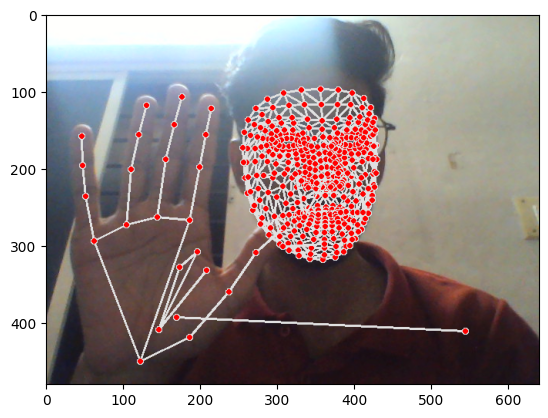

In [75]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [76]:
len(results.right_hand_landmarks.landmark)

21

In [77]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [78]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [79]:
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks
    else np.zeros(1404)
)



In [80]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [81]:
result_test = extract_keypoints(results)

In [82]:
result_test

array([ 0.5244419 ,  0.54946351, -1.70064759, ...,  0.07267898,
        0.32928354, -0.09526445])

In [83]:
np.save('0', result_test)

In [84]:
np.load('0.npy')

array([ 0.5244419 ,  0.54946351, -1.70064759, ...,  0.07267898,
        0.32928354, -0.09526445])

# 4. Setup Folders for Collection

In [85]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [86]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # 🔹 Make sure action folder exists
    os.makedirs(action_path, exist_ok=True)

    # 🔹 Handle case when folder is empty
    try:
        dirmax = np.max(np.array(os.listdir(action_path)).astype(int))
    except (ValueError, FileNotFoundError):
        dirmax = 0

    # 🔹 Create new sequence folders
    for sequence in range(1, no_sequences + 1):
        os.makedirs(os.path.join(action_path, str(dirmax + sequence)), exist_ok=True)

# 5. Collect Keypoint Values for Training and Testing

In [87]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [88]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [89]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [90]:
label_map = {label:num for num, label in enumerate(actions)}

In [91]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [92]:
sequences, labels = [], []
sequence_length = 30  # number of frames per sequence
label_map = {action:i for i, action in enumerate(actions)}

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        continue  # skip missing folders

    # List sequence folders (numbered folders only)
    sequence_folders = [f for f in os.listdir(action_path) if f.isdigit()]

    for seq in sequence_folders:
        seq_path = os.path.join(action_path, seq)
        window = []

        for frame_num in range(sequence_length):
            frame_file = os.path.join(seq_path, f"{frame_num}.npy")
            
            if os.path.exists(frame_file):
                res = np.load(frame_file)
            else:
                # File missing → fill with zeros
                res = np.zeros(1662)  # replace 1662 with your landmark vector size
            
            window.append(res)
        
        sequences.append(window)
        labels.append(label_map[action])

In [93]:
np.array(sequences).shape

(270, 30, 1662)

In [94]:
np.array(labels).shape

(270,)

In [95]:
X = np.array(sequences)

In [96]:
X.shape

(270, 30, 1662)

In [97]:
y = to_categorical(labels).astype(int)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [99]:
y_test.shape

(14, 3)

# 7. Build and Train LSTM Neural Network

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [101]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [112]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [113]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [104]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - categorical_accuracy: 0.3359 - loss: 2.0967
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - categorical_accuracy: 0.3203 - loss: 1.7879
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - categorical_accuracy: 0.3516 - loss: 2.0877
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - categorical_accuracy: 0.3359 - loss: 2.7490
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - categorical_accuracy: 0.3477 - loss: 1.9752
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - categorical_accuracy: 0.3398 - loss: 3.0367
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - categorical_accuracy: 0.3633 - loss: 2.8917
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - categorical_accuracy: 0.2852 - loss: 17.7148
Epoch 9/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - categorical_accuracy: 0.3203 - loss: 21.2279
Epoch 10/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - categorical_accuracy: 0.3242 - loss: 10.5946
Epoch 11/2000
8/8

In [105]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [106]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [107]:
actions[np.argmax(res[4])]

'hello'

In [108]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [109]:
model.save('action.h5')

In [110]:
del model

In [114]:
# Load weights
model.load_weights('action.h5')


# 10. Evaluation using Confusion Matrix and Accuracy

In [115]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [116]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


In [118]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [119]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 11],
        [ 0,  3]],

       [[10,  0],
        [ 4,  0]],

       [[ 7,  0],
        [ 7,  0]]], dtype=int64)

In [120]:
accuracy_score(ytrue, yhat)

0.21428571428571427

# 11. Test in Real Time

In [121]:
from scipy import stats

In [136]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Flatten res to 1D array
    res = np.array(res).flatten()
    
    # Limit number of bars to available actions/colors
    num_classes = min(len(res), len(actions))
    
    for num in range(num_classes):
        prob = res[num]  # scalar
        cv2.rectangle(output_frame,(0, 60 + num*40),(int(prob*100), 90 + num*40),colors[num],-1)
        cv2.putText(output_frame,actions[num],(0, 85 + num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 255, 255),2,cv2.LINE_AA)
    return output_frame


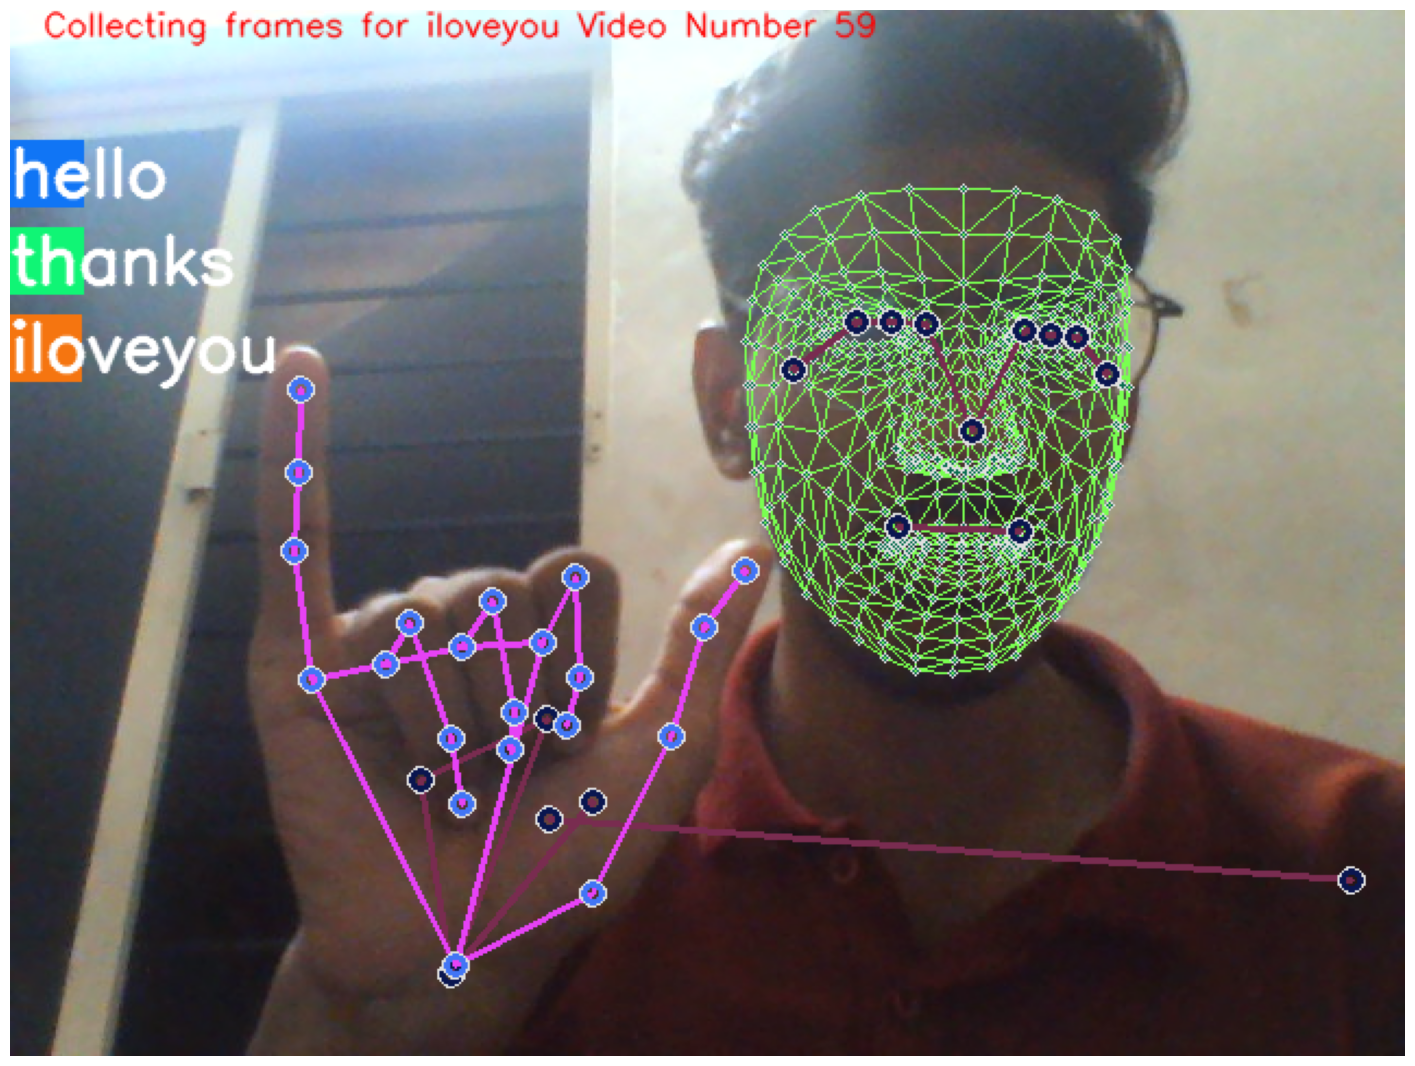

In [138]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(18, 18))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [140]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti